# What are the optimal skills to learn?

## Methodology
1. Load and clean-up data.
2. Visualize median salary vs skill demand.

# 1. Load and clean-up data.

In [20]:
# Importing libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

# Load data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) # Skills from str to list

In [32]:
# Filter for job of my interest
job_list=['Data Analyst', 'Business Analyst', 'Data Scientist']
df_DA = df[df['job_title_short'].isin(job_list)].copy()

In [33]:
# Analyse only jobs with year salary
df_DA = df_DA.dropna(subset=['salary_year_avg'])

In [86]:
# Group data
df_exploded = df_DA.explode('job_skills')
df_grouped = df_exploded.groupby('job_skills').agg(
    median_salary = ('salary_year_avg', 'median'),
    skill_count = ('job_skills', 'size')
).sort_values(by='skill_count', ascending=False).head(12)

In [87]:
# Calculate the likelihood of a specific skill being present in a job posting.
job_postings_number =len(df_DA)

df_grouped['skill_percent'] = df_grouped['skill_count'] / job_postings_number * 100

# 2. Visualize median salary vs skill demand 

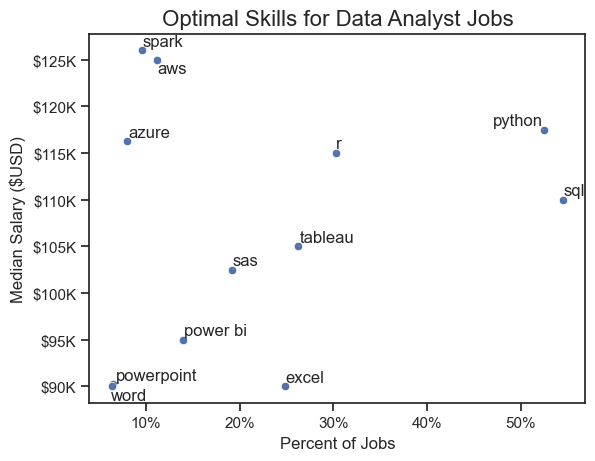

In [89]:
# Create a scatter plot
sns.scatterplot(data=df_grouped, x='skill_percent', y='median_salary')
sns.set_theme(style='ticks')

# Format Axis
from matplotlib.ticker import PercentFormatter
ax=plt.gca()
ax.xaxis.set_major_formatter(PercentFormatter(100))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

# Add data labels
from adjustText import adjust_text
texts = []
for i, txt in enumerate(df_grouped.index):
    texts.append(plt.text(df_grouped['skill_percent'].iloc[i],df_grouped['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray'))

# Add chart labels
plt.xlabel('Percent of Jobs')
plt.ylabel('Median Salary ($USD)')
plt.title('Optimal Skills for Data Analyst Jobs', fontsize=16)
plt.show()